In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
#os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
os.chdir('/Users/bojk/Google Drive/QuakeLab/Data/')
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
sys.path.append('/Users/bojk/Google Drive/QuakeLab/minimeta_pyfiles/')
import imp
import HTSeq
from scipy.stats import powerlaw
import minimetagenome_analysis as minimeta

import mock_metagenome_creation as mock
imp.reload(mock)
#import reassembly as rea
#import subcluster_bins as sub
#import checkm_out_plot as cop
#import checkm_out as co

import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#metagenome_fasta = '/home/datastorage/ASSEMBLY_DATA/PermafrostFranklinBluffs/Combined_Analysis/super_contigs.PermafrostWestD.fasta'
metagenome_fasta = 'Permafrost/FranklinBluffs/'
save_dir = 'Permafrost/FranklinBluffs/pickles/'

In [12]:
maindf = pd.read_pickle('Permafrost/FranklinBluffs/pickles/maindf_withDepth')
contigdf = maindf[['Sequence Length','GC Content']].copy()
contigdf.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)
"""contig2 = pd.read_csv('Permafrost/SIMR/WestDock_metadata.table').set_index('Unnamed: 0')[['Sequence Length','GC Content']]
contigdf.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)
contig2.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)"""

"contig2 = pd.read_csv('Permafrost/SIMR/WestDock_metadata.table').set_index('Unnamed: 0')[['Sequence Length','GC Content']]\ncontigdf.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)\ncontig2.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)"

In [4]:
FB6mers = pd.read_pickle('Permafrost/FranklinBluffs/pickles/kmerdf_from_metagenome_fasta_6mer.pickle')
FBchipcount = pd.read_pickle('Permafrost/FranklinBluffs/pickles/FranklinBluffs_chipdf_bpcounts')

In [9]:
FB6mers_mini = FB6mers[~FB6mers.index.str.contains('Bulk')]
FBchipcount_mini = FBchipcount.loc[FB6mers_mini.index]
FBchipcount_mini.drop(['FranklinBluffs_55cm_Bulk','FranklinBluffs_40cm_Bulk'],axis=1,inplace=True)


In [14]:
import minimetagenome_dimensionality as miniD
imp.reload(miniD)
maindir = 'Permafrost/FranklinBluffs/new_clustering/'

tsnedf_minicov = miniD.perform_complete_analysis_Coverage(FBchipcount_mini,6,contigdf,maindir,'FBminiCovOnly')

tSNE-df previously made, loading from pickle, full path = 
Permafrost/FranklinBluffs/new_clustering/tsnedf_FBminiCovOnly_6mers.pickle
Performing PCA...
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 148.00 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 155.88 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 151.08 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 151.43 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 152.23 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 156.35 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 38 PCs
fi

In [40]:
FB6mers_mini.shape[1]

4096

In [ ]:
imp.reload(miniD)
tsnedf_minikmer = miniD.perform_complete_analysis_Coverage(FB6mers_mini,6,contigdf,maindir,'FBminik6mers')

tSNE-df previously made, loading from pickle, full path = 
Permafrost/FranklinBluffs/new_clustering/tsnedf_FBminik6mers_6mers.pickle
PCA performed earlier, loading file:
Permafrost/FranklinBluffs/new_clustering/PCAdf_FBminik6mers_6mers.pickle
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 160.75 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 157.17 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 163.95 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 167.36 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 161.77 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 163.6

In [ ]:
imp.reload(miniD)
tsnedf_minikmer_scale = miniD.perform_complete_analysis_Coverage(FB6mers_mini,6,contigdf,maindir,'FBminik6mers_withtsnescaling')

building tSNE of all 4096 dimensions
finished building main tSNE, this took 485.21 seconds
performing cluster sweep of tSNE of all 4096 dimensions
Performing PCA...
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 165.33 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 166.62 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 185.63 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 182.23 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 187.77 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 163.82 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE

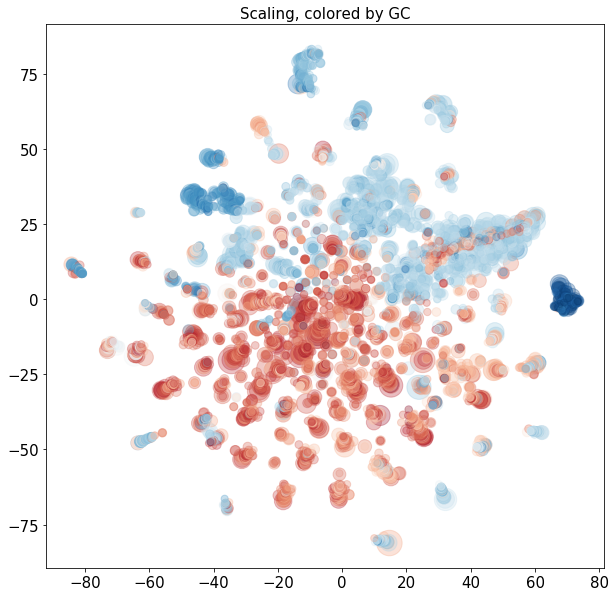

In [18]:
"""x = StandardScaler().fit_transform(FBchipcount_mini)
idx = FBchipcount_mini.index
x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x)"""
tsnedf1 = pd.DataFrame(x_emb,index=FBchipcount_mini.index)
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsnedf[0],tsnedf[1],s=contigdf.loc[idx,'Sequence length'].astype(float)/100,
            alpha=.3,c=contigdf.loc[idx,'GC'],cmap='RdBu_r')
plt.title('Scaling, colored by GC')
plt.show()

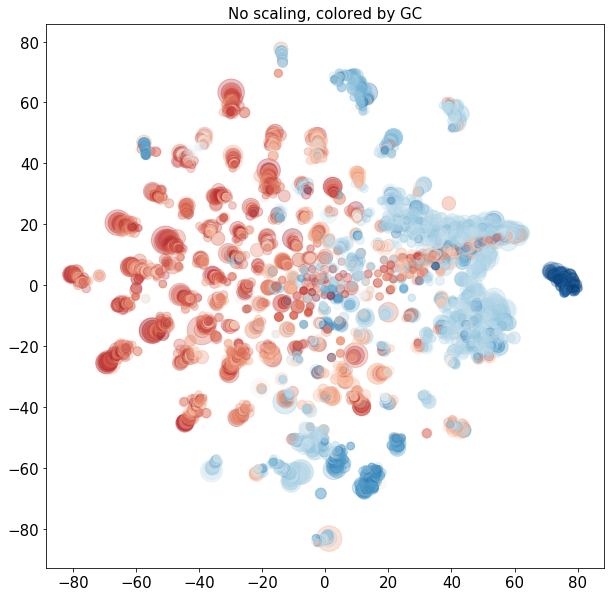

In [19]:
x = FBchipcount_mini
idx = FBchipcount_mini.index
x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x)
tsnedf2 = pd.DataFrame(x_emb,index=FBchipcount_mini.index)
f,ax = plt.subplots(1,1,figsize=(10,10))
            alpha=.3,c=contigdf.loc[idx,'GC'],cmap='RdBu_r')
plt.title('No scaling, colored by GC')
plt.show()

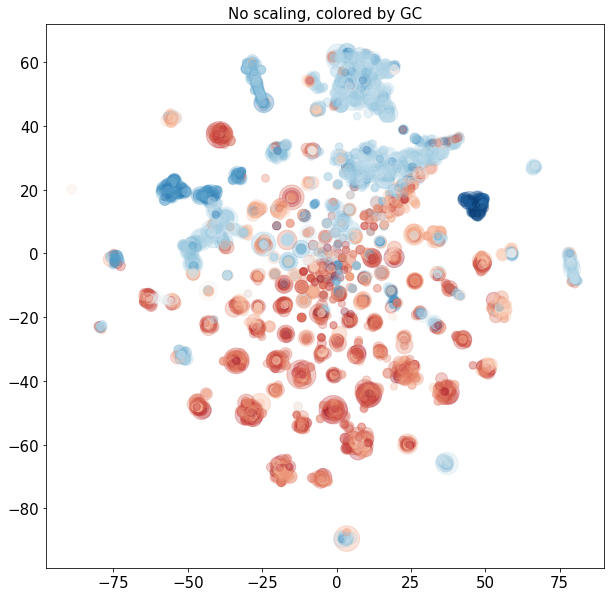

In [25]:
idx = FBchipcount_mini.index
x = FBchipcount_mini.divide(contigdf.loc[idx,'Sequence length'],axis=0)
x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x)
tsnedf = pd.DataFrame(x_emb,index=FBchipcount_mini.index)
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsnedf[0],tsnedf[1],s=contigdf.loc[idx,'Sequence length'].astype(float)/100,
            alpha=.3,c=contigdf.loc[idx,'GC'],cmap='RdBu_r')
plt.title('No scaling, colored by GC')
plt.show()

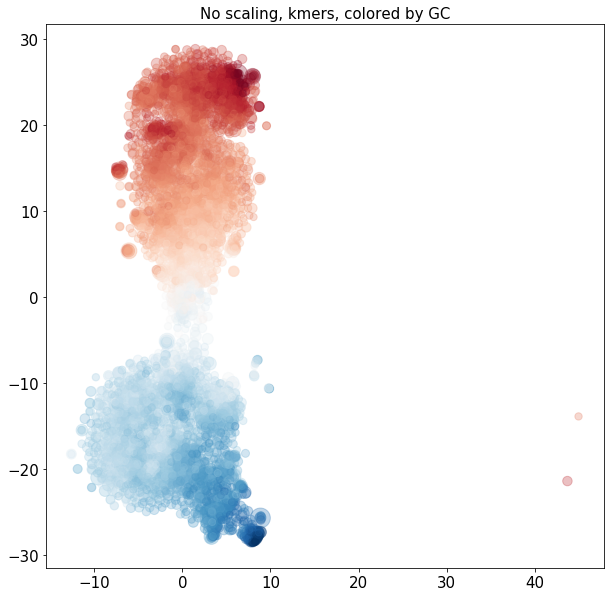

In [26]:
idx = FB6mers_mini.index
x = FB6mers_mini.divide(contigdf.loc[idx,'Sequence length'],axis=0)
x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x)
tsnedf = pd.DataFrame(x_emb,index=idx)
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsnedf[0],tsnedf[1],s=contigdf.loc[idx,'Sequence length'].astype(float)/100,
            alpha=.3,c=contigdf.loc[idx,'GC'],cmap='RdBu_r')
plt.title('No scaling, kmers, colored by GC')
plt.show()

In [27]:
idx = FB6mers_mini.index
x = FB6mers_mini.divide(contigdf.loc[idx,'Sequence length'],axis=0)
x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x.T)
tsnedf = pd.DataFrame(x_emb,index=idx)
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsnedf[0],tsnedf[1],s=contigdf.loc[idx,'Sequence length'].astype(float)/100,
            alpha=.3,c=contigdf.loc[idx,'GC'],cmap='RdBu_r')
plt.title('No scaling, kmers, colored by GC')
plt.show()

ValueError: Shape of passed values is (4096, 2), indices imply (6426, 2)

In [28]:
x

,AAAAAA,AAAAAC,AAAAAT,AAAAAG,AAAACA,AAAACC,AAAACT,AAAACG,AAAATA,AAAATC,...,GGGGCT,GGGGCG,GGGGTA,GGGGTC,GGGGTT,GGGGTG,GGGGGA,GGGGGC,GGGGGT,GGGGGG
SuperContig_NODE_1_length_84353_cov_1.44384,0.000249,0.000273,0.000190,0.000095,0.000130,0.000237,0.000059,0.000249,0.000130,0.000368,...,0.000130,0.000237,0.000024,0.000202,0.000119,0.000237,0.000083,0.000107,0.000130,0.000047
SuperContig_NODE_2_length_80600_cov_1.02193,0.000025,0.000112,0.000025,0.000087,0.000050,0.000174,0.000074,0.000074,0.000000,0.000074,...,0.000186,0.000298,0.000062,0.000161,0.000099,0.000273,0.000112,0.000136,0.000050,0.000050
SuperContig_NODE_3_length_70854_cov_0.152286,0.000042,0.000113,0.000014,0.000056,0.000042,0.000099,0.000042,0.000127,0.000014,0.000028,...,0.000198,0.000438,0.000113,0.000240,0.000141,0.000127,0.000071,0.000113,0.000056,0.000056
SuperContig_NODE_4_length_68095_cov_20.758,0.001498,0.000661,0.001145,0.001131,0.000793,0.000587,0.000411,0.000308,0.000852,0.000631,...,0.000220,0.000132,0.000220,0.000117,0.000411,0.000206,0.000220,0.000132,0.000191,0.000059
SuperContig_NODE_5_length_65871_cov_0.345025,0.000015,0.000030,0.000015,0.000030,0.000061,0.000061,0.000046,0.000091,0.000015,0.000015,...,0.000319,0.000622,0.000091,0.000197,0.000197,0.000258,0.000106,0.000304,0.000152,0.000137
SuperContig_NODE_6_length_65512_cov_0.286961,0.000259,0.000259,0.000153,0.000183,0.000183,0.000168,0.000137,0.000305,0.000076,0.000351,...,0.000244,0.000275,0.000046,0.000107,0.000061,0.000198,0.000076,0.000214,0.000092,0.000076
SuperContig_NODE_7_length_65180_cov_0.146587,0.000169,0.000292,0.000184,0.000184,0.000092,0.000230,0.000245,0.000292,0.000215,0.000307,...,0.000338,0.000506,0.000184,0.000199,0.000230,0.000138,0.000307,0.000276,0.000199,0.000215
SuperContig_NODE_8_length_63576_cov_0.497913,0.000079,0.000126,0.000063,0.000063,0.000094,0.000126,0.000142,0.000079,0.000047,0.000142,...,0.000079,0.000252,0.000016,0.000079,0.000142,0.000173,0.000094,0.000252,0.000016,0.000079
SuperContig_NODE_9_length_61425_cov_0.251981,0.000049,0.000114,0.000114,0.000098,0.000212,0.000179,0.000114,0.000195,0.000081,0.000130,...,0.000130,0.000342,0.000065,0.000179,0.000081,0.000114,0.000130,0.000147,0.000033,0.000244
SuperContig_NODE_10_length_60823_cov_0.169323,0.000115,0.000148,0.000132,0.000148,0.000066,0.000197,0.000115,0.000164,0.000082,0.000115,...,0.000148,0.000181,0.000082,0.000066,0.000132,0.000082,0.000099,0.000132,0.000049,0.000082


In [78]:
imp.reload(miniD)
#main = pd.read_csv('Permafrost/SIMR/WestDock_metadata.table').set_index('Unnamed: 0')
#tsnedf_WDminiCov = pd.read_pickle(maindir+'WDminiCovOnly6mers_all_tSNEs')aaaa
miniD.plotPCs(tsnedf_WDminiCov,main,maindir,'WDminiChipAbsCov') 

In [87]:
idx = tsnedf_WDminiCov.index
maindf_mini = maindf.loc[idx].copy()
maindf_mini = maindf_mini.join(tsnedf_WDminiCov[['x_PC13','y_PC13']])
#tsnedf_WDminiCov

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [99]:
#get tsne cols in the right format (write function to do this, then pass on to 
#                                  standard minimeta pipeline)
imp.reload(minimeta)
"""
minCS ['min_cluster_size']
minS ['min_samples']
CSM ['cluster_selection_method']
ASC ['allow_single_cluster']
perp ['perplexity_na'] # this is a string of the form '40_a' or '60_n' (so perplexity and absolute or normalized tsne)
expt_name ['expt_name']
write_fasta ['write_fasta'] # save the fasta Y/n (as in: do dry run clustering first, as fasta writing takes time)
writedf ['write_df']
series ['is_this_a_series']
"""
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [100,1,'leaf',False,'PC13','WestDock_mini','NO','NO','NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
maindf_mini = minimeta.cluster_main_tsne(maindf_mini,**kwargs) # cluster whatever pcs you want here.

In [92]:
maindf_mini.groupby('DBclusternum').sum()[['Sequence Length','Read Depth']]
maindf_mini.shape

(16619, 51)

In [97]:
size = maindf_mini['Sequence Length']
maindf_mini.plot.scatter('x_PC13','y_PC13',s=size.divide(3e2).astype(float),alpha=.05)#,ax=ax1,c=colors)

In [ ]:
# compute WD kmers
fastapath = 'Permafrost/WestDock/super_contigs.PermafrostWestDock.fasta'
savedir = 'Permafrost/WestDock/pickles/'
contig6mers,k6mers  = mock.make_kmertable_from_fasta_contigs(fastapath,6,savedir)

Total number of fasta sequences:45613
----------------------------------------------------
Started collecting kmers, dimensionality = 4096
Local time: 22:24
----------------------------------------------------
